<a href="https://colab.research.google.com/github/jsale017/hack_diversity_tech_dive_2024/blob/main/Diamond_Hackers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Diamond Analysis
## Hack Diversity Tech Dive




## Colaborators:
> Anmar


> Rhoda Nankabirwa


> Amy



> Jose Salerno



## Notebook Outline

1.   Data Exploration
2.   Data Cleaning
3.   Visualizations
4.   Clustering
5. Questions & Answers



## 1. Data Exploration

In [14]:
## Importing Necessary packages
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [15]:
## Mounting Google Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [16]:
## Reading Dataset
diamond_df = pd.read_csv('/content/drive/MyDrive/hackdiversity/wholesale_diamonds_2012_2023.csv')
diamond_df.head()

,index,carat,cut,color,clarity,depth,table,cost (dollars),length (mm),width (mm),height (mm),year
0,0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43,2012
1,1,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31,2012
2,2,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63,2012
3,3,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75,2012
4,4,0.24,Very Good,J,VVS2,62.8,57.0,336,3.94,3.96,2.48,2012


In [17]:
## Renaming Columns
diamond_df.rename(columns = {'cost (dollars)': 'cost_dollars',
                     'length (mm)':'length_mm',
                     'width (mm)':'width_mm',
                     'height (mm)':'height_mm'}, inplace = True)

In [18]:
## Dataset Statistics
diamond_df.describe()

,index,carat,depth,table,cost_dollars,length_mm,width_mm,height_mm,year
count,407280.000000,405232.000000,407280.000000,407280.000000,407280.000000,407280.000000,407280.000000,407280.000000,407280.000000
mean,16969.500000,0.797742,61.747793,57.457113,4372.968506,5.730165,5.732369,3.538519,2017.500000
std,9797.646092,0.474774,1.434209,2.239837,4503.620949,1.122960,1.114266,0.712168,3.452057
min,0.000000,0.200000,43.000000,43.000000,-998.000000,0.000000,0.000000,0.000000,2012.000000
25%,8484.750000,0.400000,61.000000,56.000000,1043.000000,4.710000,4.720000,2.910000,2014.750000
50%,16969.500000,0.700000,61.800000,57.000000,2655.000000,5.690000,5.710000,3.520000,2017.500000
75%,25454.250000,1.040000,62.500000,59.000000,5960.000000,6.530000,6.530000,4.030000,2020.250000
max,33939.000000,4.130000,79.000000,95.000000,26930.000000,10.140000,10.100000,31.800000,2023.000000


In [19]:
diamond_df.describe(include=['object','category'])

,cut,color,clarity
count,407280,407280,407280
unique,5,7,8
top,Ideal,G,SI1
freq,162876,86064,98844


In [20]:
diamond_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 407280 entries, 0 to 407279
Data columns (total 12 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   index         407280 non-null  int64  
 1   carat         405232 non-null  float64
 2   cut           407280 non-null  object 
 3   color         407280 non-null  object 
 4   clarity       407280 non-null  object 
 5   depth         407280 non-null  float64
 6   table         407280 non-null  float64
 7   cost_dollars  407280 non-null  int64  
 8   length_mm     407280 non-null  float64
 9   width_mm      407280 non-null  float64
 10  height_mm     407280 non-null  float64
 11  year          407280 non-null  int64  
dtypes: float64(6), int64(3), object(3)
memory usage: 37.3+ MB


## 2. Data Cleaning Process

In [21]:
# Check for missing values in the DataFrame
missing_values = diamond_df.isnull()
# Display the DataFrame with True for missing values and False for non-missing values
print("\nDataFrame with Missing Values:")
print(missing_values)


DataFrame with Missing Values:
        index  carat    cut  color  clarity  depth  table  cost_dollars  \
0       False  False  False  False    False  False  False         False   
1       False  False  False  False    False  False  False         False   
2       False  False  False  False    False  False  False         False   
3       False  False  False  False    False  False  False         False   
4       False  False  False  False    False  False  False         False   
...       ...    ...    ...    ...      ...    ...    ...           ...   
407275  False  False  False  False    False  False  False         False   
407276  False  False  False  False    False  False  False         False   
407277  False  False  False  False    False  False  False         False   
407278  False  False  False  False    False  False  False         False   
407279  False  False  False  False    False  False  False         False   

        length_mm  width_mm  height_mm   year  
0           False  

In [22]:
## Number of missing values per columns
print("\nCount of Missing Values in Each Column:")
print(diamond_df.isnull().sum())


Count of Missing Values in Each Column:
index              0
carat           2048
cut                0
color              0
clarity            0
depth              0
table              0
cost_dollars       0
length_mm          0
width_mm           0
height_mm          0
year               0
dtype: int64


In [24]:
## Dropping missing values in Carat variable
diamond_df.dropna(inplace=True)

In [25]:
print(diamond_df['length_mm'].unique())

[ 3.95  4.05  4.2   4.34  3.94  4.    4.25  3.93  3.88  4.35  3.79  4.23
  4.21  3.85  4.39  4.44  3.97  3.96  4.04  4.01  3.92  4.29  4.13  4.49
  4.36  4.33  3.91  4.3   4.78  4.28  4.19  4.03  4.02  4.65  4.07  5.7
  6.45  5.68  5.81  6.27  5.77  6.    5.8   5.85  5.87  5.96  5.73  5.98
  5.72  5.64  5.57  5.65  5.56  6.11  6.03  5.89  5.69  5.74  5.53  5.62
  5.83  5.66  5.79  5.78  5.92  5.97  6.01  5.39  5.33  6.83  5.41  5.24
  5.67  5.71  5.76  5.6   5.19  5.9   6.39  5.34  5.88  5.11  6.07  6.29
  6.31  5.82  6.49  5.94  5.48  6.02  5.91  6.17  6.61  6.19  5.43  6.37
  6.46  5.75  5.93  5.84  6.21  6.16  6.15  5.63  6.14  5.49  4.37  4.47
  4.31  4.41  4.26  4.54  4.48  4.5   4.56  4.94  5.15  5.86  5.23  6.08
  6.62  6.26  5.99  6.73  5.52  5.61  6.04  6.43  6.36  6.34  5.2   5.37
  6.06  5.51  6.05  6.9   6.24  6.41  5.36  5.47  6.09  6.6   6.3   6.75
  5.54  6.22  6.78  6.12  6.38  6.82  5.44  4.09  4.57  4.32  4.52  4.43
  4.42  4.45  4.46  5.45  6.93  6.4   5.25  6.55  5.

In [26]:
print(diamond_df['width_mm'].unique())

[ 3.98  4.07  4.23  4.35  3.96  4.05  4.28  3.9   3.84  4.37  3.75  4.26
  4.27  3.92  4.43  4.47  4.01  3.94  3.97  3.99  4.03  4.06  4.31  4.16
  4.51  4.55  4.42  4.38  3.95  3.88  4.33  4.29  4.32  4.84  4.    4.24
  4.25  4.22  4.04  4.12  4.67  5.72  6.33  5.73  5.85  5.95  5.78  5.96
  5.79  5.8   6.    5.82  5.74  5.94  5.76  5.69  5.83  5.61  5.53  5.59
  5.58  6.09  5.99  5.86  5.68  5.77  5.56  5.81  5.87  5.65  5.75  5.89
  5.92  6.03  5.44  5.37  6.9   5.88  5.84  5.26  5.7   5.9   5.64  5.51
  5.22  5.93  6.36  5.15  6.1   6.21  6.22  6.45  6.01  5.41  6.05  5.66
  5.91  6.13  6.55  5.35  6.02  5.46  6.23  6.41  6.34  5.71  5.67  6.19
  5.43  6.07  6.06  4.34  4.2   4.5   4.57  4.52  4.53  4.58  5.    5.11
  5.27  6.04  6.53  6.65  5.54  5.52  5.63  6.39  6.12  5.21  5.4   5.98
  6.83  5.6   6.37  6.31  5.38  6.18  5.97  5.49  5.57  5.62  6.26  6.67
  6.75  6.29  6.74  4.08  4.59  4.41  4.4   4.39  5.48  6.88  6.11  5.3
  6.48  5.47  5.13  6.49  6.25  6.43  6.27  6.14  5.

In [27]:
print(diamond_df['height_mm'].unique())

[ 2.43  2.31  2.63  2.75  2.48  2.47  2.39  2.73  2.46  2.33  2.71  2.27
  2.66  2.62  2.59  2.41  2.4   2.42  2.44  2.52  2.78  2.76  2.79  2.54
  2.64  2.67  2.7   2.69  2.68  2.96  2.45  2.49  2.53  2.55  2.87  3.57
  3.52  3.56  3.72  4.07  3.58  3.59  3.63  3.67  3.6   3.68  3.62  3.47
  3.46  3.32  3.93  3.95  3.64  3.53  3.43  3.5   3.48  3.65  3.55  3.54
  3.49  3.51  3.33  3.3   3.38  4.13  3.35  3.79  3.61  3.23  3.4   3.19
  3.94  3.08  3.75  3.18  4.03  4.09  3.69  3.76  3.87  3.83  3.31  3.44
  3.74  3.8   3.88  4.    3.98  3.66  3.7   3.78  3.84  4.01  4.18  3.45
  2.74  2.72  2.8   2.77  2.9   2.82  3.85  3.73  4.08  3.22  3.34  3.86
  3.89  3.96  3.81  3.42  3.91  3.71  3.77  4.06  4.11  4.23  3.92  3.9
  2.83  4.04  3.82  3.37  4.21  3.27  4.1   3.99  3.97  3.41  3.24  3.17
  4.29  3.21  4.02  2.88  2.56  2.65  2.61  4.16  3.2   4.14  4.26  4.12
  4.7   2.5   4.19  3.13  4.05  3.39  3.26  4.27  4.2   4.15  2.97  3.36
  4.42  4.38  3.29  0.    4.78  2.99  3.16  2.51  2.

In [39]:
# Counting the number of rows with width less than or equal to zero
negative_or_zero_width_count = (diamond_df['width_mm'] <= 0).sum()

print("Number of values in 'width_mm' with width less than or equal to zero:", negative_or_zero_width_count)

Number of values in 'width_mm' with width less than or equal to zero: 36


In [42]:
# Counting the number of rows with width less than or equal to zero
negative_or_zero_length_count = (diamond_df['length_mm'] <= 0).sum()

print("Number of values in 'length_mm' with length less than or equal to zero:", negative_or_zero_length_count)

Number of values in 'length_mm' with length less than or equal to zero: 48


In [43]:
# Counting the number of rows with width less than or equal to zero
negative_or_zero_height_count = (diamond_df['height_mm'] <= 0).sum()

print("Number of values in 'height_mm' with height less than or equal to zero:", negative_or_zero_height_count)

Number of values in 'height_mm' with height less than or equal to zero: 132


In [44]:
# Counting the number of rows with width less than or equal to zero
negative_or_zero_table_count = (diamond_df['table'] <= 0).sum()

print("Number of values in 'table' with value less than or equal to zero:", negative_or_zero_table_count)

Number of values in 'table' with value less than or equal to zero: 0


In [45]:
# Counting the number of rows with width less than or equal to zero
negative_or_zero_depth_count = (diamond_df['depth'] <= 0).sum()

print("Number of values in 'depth' with value less than or equal to zero:", negative_or_zero_depth_count)

Number of values in 'depth' with value less than or equal to zero: 0


In [46]:
# Counting the number of rows with width less than or equal to zero
negative_or_zero_carat_count = (diamond_df['carat'] <= 0).sum()

print("Number of values in 'carat' with value less than or equal to zero:", negative_or_zero_carat_count)

Number of values in 'carat' with value less than or equal to zero: 0


In [34]:
# Checking for unique values in the year column
print(diamond_df['year'].unique())

[2012 2013 2014 2015 2016 2017 2018 2019 2020 2021 2022 2023]


In [40]:
# Check for unique values in the cost_dollars column
print(diamond_df['cost_dollars'].unique())

[ 326  327  334 ... -238 -761 -806]


In [47]:
# Counting the number of rows with negative or zero prices
negative_or_zero_values_count = (diamond_df['cost_dollars'] <= 0).sum()

print("Number of rows with negative or zero prices in 'cost_dollars':", negative_or_zero_values_count)


Number of rows with negative or zero prices in 'cost_dollars': 2040


In [48]:
# Identify numeric columns
numeric_columns = diamond_df.select_dtypes(include=['number']).columns

# Droping rows where at least one numeric column has a value less than or equal to 0
diamond_df = diamond_df[(diamond_df[numeric_columns] > 0).all(axis=1)]

In [49]:
diamond_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 403049 entries, 1 to 407279
Data columns (total 12 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   index         403049 non-null  int64  
 1   carat         403049 non-null  float64
 2   cut           403049 non-null  object 
 3   color         403049 non-null  object 
 4   clarity       403049 non-null  object 
 5   depth         403049 non-null  float64
 6   table         403049 non-null  float64
 7   cost_dollars  403049 non-null  int64  
 8   length_mm     403049 non-null  float64
 9   width_mm      403049 non-null  float64
 10  height_mm     403049 non-null  float64
 11  year          403049 non-null  int64  
dtypes: float64(6), int64(3), object(3)
memory usage: 40.0+ MB


In [50]:
diamond_df.describe()

,index,carat,depth,table,cost_dollars,length_mm,width_mm,height_mm,year
count,403049.000000,403049.000000,403049.000000,403049.000000,403049.000000,403049.000000,403049.000000,403049.000000,403049.000000
mean,16972.458120,0.797543,61.747950,57.457361,4396.659143,5.730381,5.732401,3.539603,2017.500254
std,9796.286636,0.474654,1.434202,2.240105,4500.786342,1.121121,1.112858,0.709608,3.452029
min,1.000000,0.200000,43.000000,43.000000,304.000000,3.730000,3.680000,1.070000,2012.000000
25%,8491.000000,0.400000,61.000000,56.000000,1053.000000,4.710000,4.720000,2.910000,2015.000000
50%,16974.000000,0.700000,61.800000,57.000000,2676.000000,5.690000,5.710000,3.520000,2018.000000
75%,25454.000000,1.040000,62.500000,59.000000,5983.000000,6.530000,6.530000,4.030000,2021.000000
max,33939.000000,4.130000,79.000000,95.000000,26930.000000,10.140000,10.100000,31.800000,2023.000000


In [51]:
# Displaying the count of each cut type
cut_counts = diamond_df['cut'].value_counts()
print("Count of diamonds for each cut type:")
print(cut_counts)

Count of diamonds for each cut type:
Ideal        161172
Premium      102597
Very Good     90801
Good          36665
Fair          11814
Name: cut, dtype: int64


In [54]:
# Display the count of each color type
color_counts = diamond_df['color'].value_counts()
print("Count of diamonds for each color type:")
print(color_counts)

Count of diamonds for each color type:
G    85221
E    72595
F    70106
H    62998
D    50803
I    40264
J    21062
Name: color, dtype: int64


In [56]:
# Display the count of each clarity type
clarity_counts = diamond_df['clarity'].value_counts()
print("Count of diamonds for each clarity type:")
print(clarity_counts)

Count of diamonds for each clarity type:
SI1     97876
VS2     91028
SI2     69242
VS1     60653
VVS2    37631
VVS1    28089
IF      13083
I1       5447
Name: clarity, dtype: int64


## 3. Visualizations

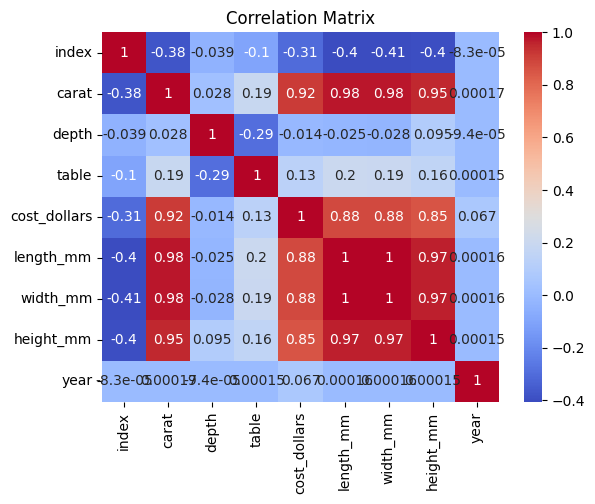

In [88]:
## Correlation Matrix
correlation_matrix = diamond_df.corr(numeric_only=True)
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

All possible cut categories  ['Good' 'Premium' 'Very Good' 'Ideal' 'Fair']


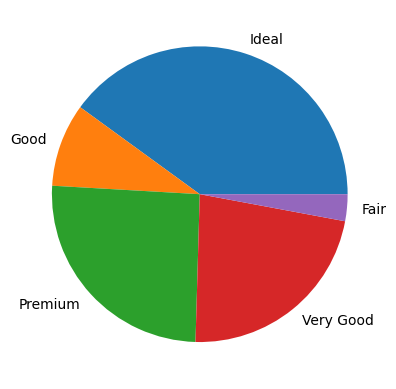

In [52]:
# distribution of diamond cuts in our dataset shown as a pie chart
print("All possible cut categories ",diamond_df['cut'].unique())
cuts = ['Ideal','Good','Premium','Very Good','Fair']
cut_values = []
for cut in cuts:
    count = diamond_df[diamond_df['cut']==cut]['cut'].count()
    cut_values.append(count)
zz=plt.pie(cut_values,labels=cuts)

All possible color categories  ['E' 'I' 'J' 'H' 'F' 'G' 'D']


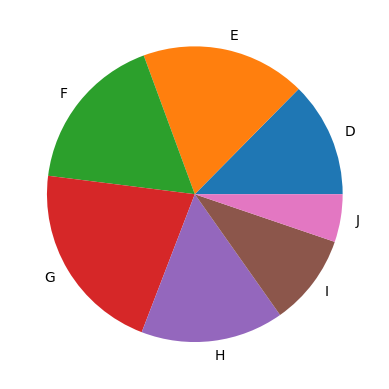

In [55]:
# distribution of diamond colors in our dataset shown as a pie chart
print("All possible color categories ",diamond_df['color'].unique())
colors = ['D', 'E', 'F', 'G', 'H', 'I', 'J']
color_values = []
for color in colors:
    count = diamond_df[diamond_df['color']==color]['color'].count()
    color_values.append(count)
zz=plt.pie(color_values,labels=colors)

All possible clarity categories  ['VS1' 'VS2' 'SI2' 'VVS2' 'VVS1' 'SI1' 'I1' 'IF']


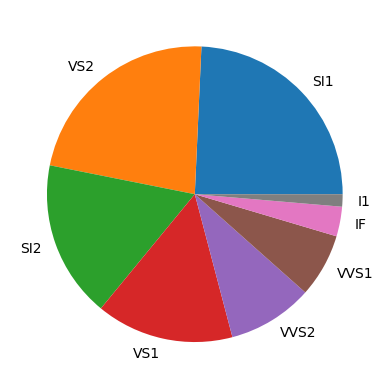

In [57]:
# distribution of diamond clarity categories in our dataset shown as a pie chart
print("All possible clarity categories ",diamond_df['clarity'].unique())
clarity_categories = ['SI1', 'VS2', 'SI2', 'VS1', 'VVS2', 'VVS1', 'IF', 'I1']
clarity_values = []
for clarity in clarity_categories:
    count = diamond_df[diamond_df['clarity']==clarity]['clarity'].count()
    clarity_values.append(count)
zz=plt.pie(clarity_values,labels=clarity_categories)

<ipython-input-63-48e7986c0cd2>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='cut', y='cost_dollars', data=diamond_df, palette="viridis", errorbar=None)


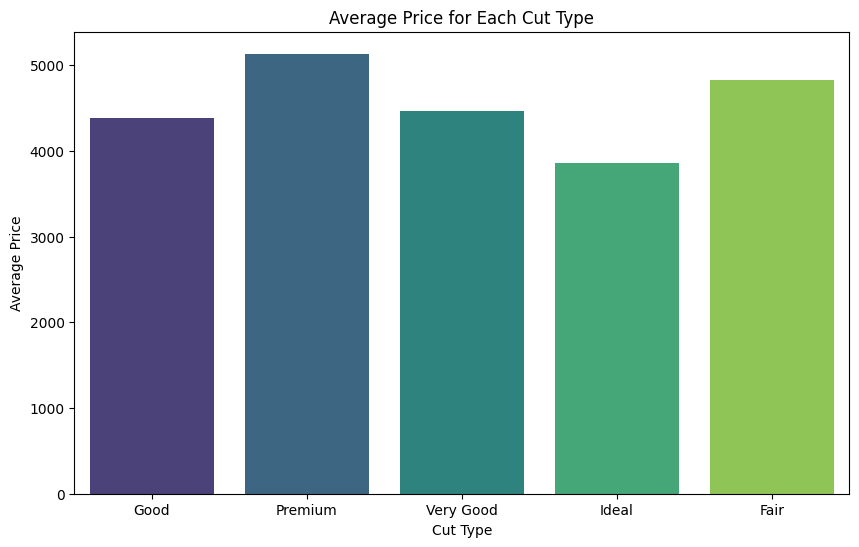

In [63]:
# Creating a bar plot to visualize the average price for each cut type
plt.figure(figsize=(10, 6))
sns.barplot(x='cut', y='cost_dollars', data=diamond_df, palette="viridis", errorbar=None)
plt.title('Average Price for Each Cut Type')
plt.xlabel('Cut Type')
plt.ylabel('Average Price')
plt.show();

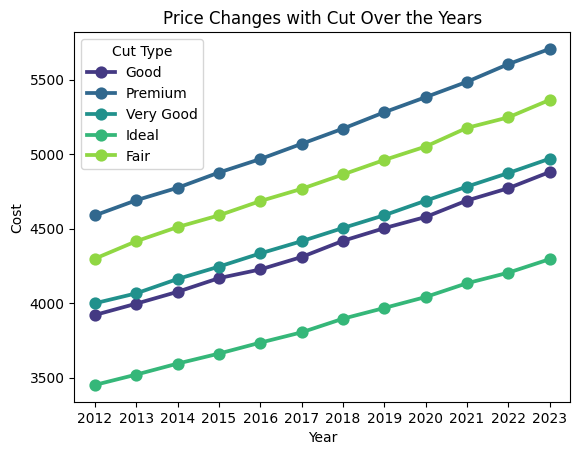

In [84]:
sns.pointplot(x='year', y='cost_dollars', hue='cut', data=diamond_df, errorbar=None, palette="viridis")
plt.title('Price Changes with Cut Over the Years')
plt.xlabel('Year')
plt.ylabel('Cost')
plt.legend(title='Cut Type')
plt.show()

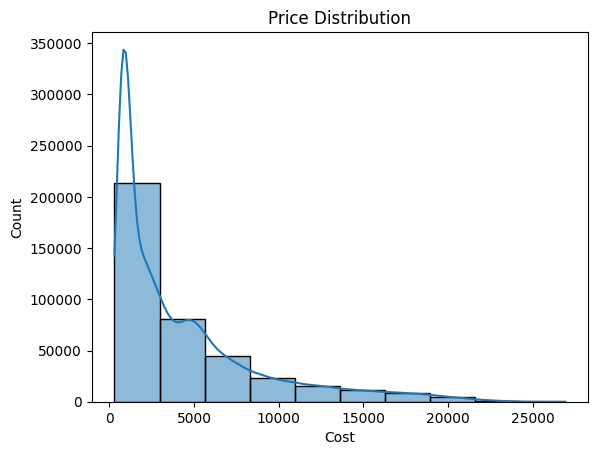

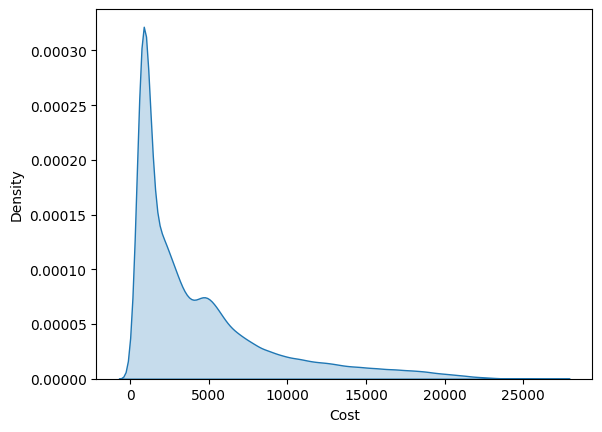

In [83]:
sns.histplot(diamond_df['cost_dollars'], bins=10, kde=True)
plt.title('Price Distribution')
plt.xlabel('Cost')
plt.show()
sns.kdeplot(data = diamond_df, x = "cost_dollars", fill = "blue")
plt.xlabel('Cost')
plt.show()

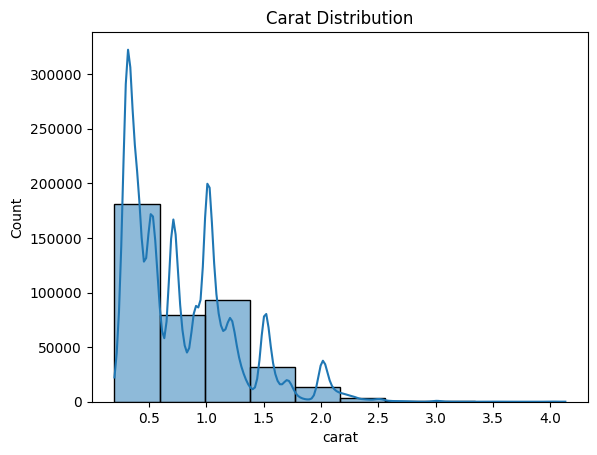

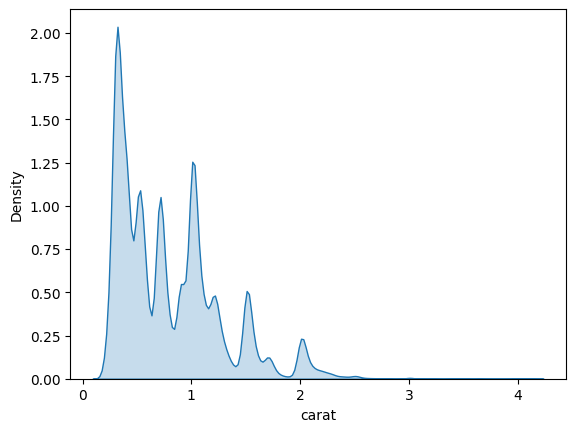

In [68]:
# distribution of carats in our dataset shown as a histogram
sns.histplot(diamond_df['carat'], bins=10, kde=True)
plt.title('Carat Distribution')
plt.show()
sns.kdeplot(data = diamond_df, x = "carat", fill = "blue")
plt.show()

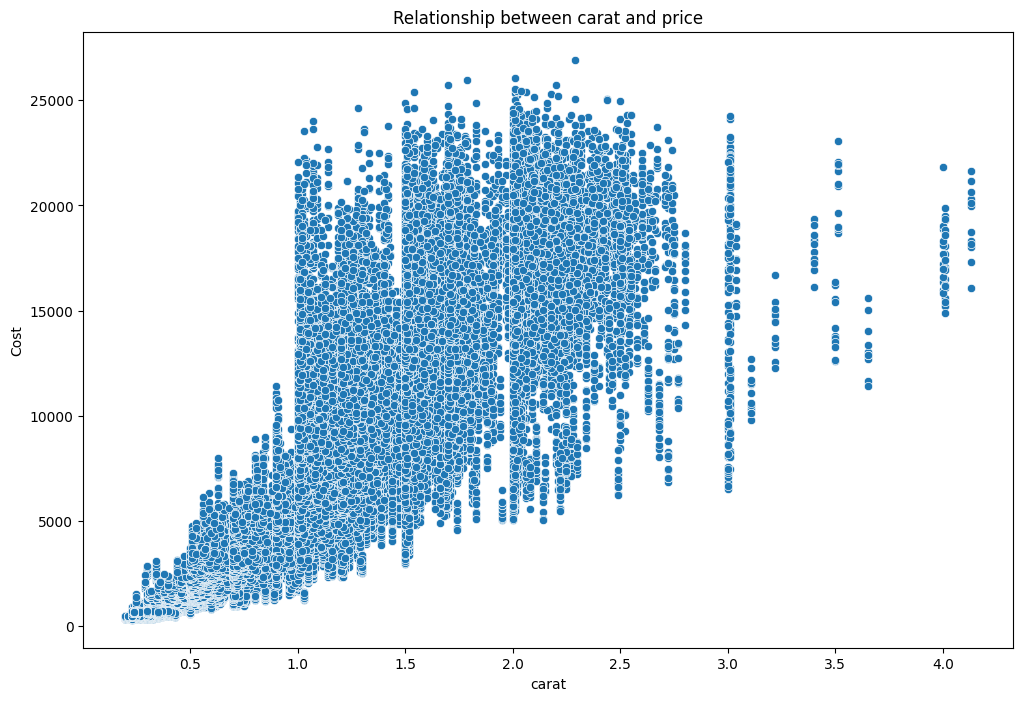

In [81]:
plt.figure(figsize=(12, 8))
sns.scatterplot(x='carat', y='cost_dollars', data=diamond_df)
plt.title('Relationship between carat and price')
plt.ylabel('Cost')
plt.show()

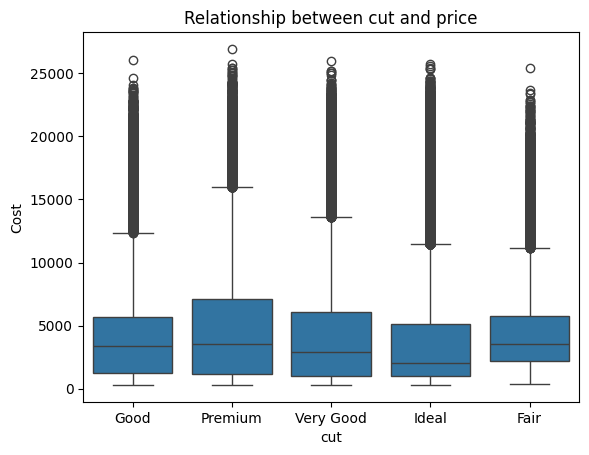

In [79]:
sns.boxplot(x='cut', y='cost_dollars', data=diamond_df)
plt.title('Relationship between cut and price')
plt.ylabel('Cost')
plt.show()

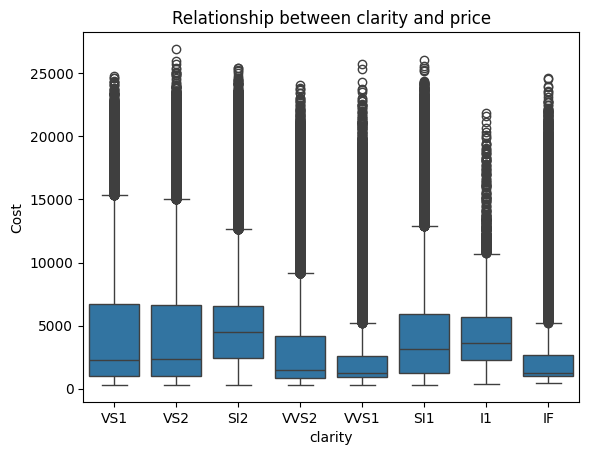

In [80]:
sns.boxplot(x='clarity', y='cost_dollars', data=diamond_df)
plt.title('Relationship between clarity and price')
plt.ylabel('Cost')
plt.show()

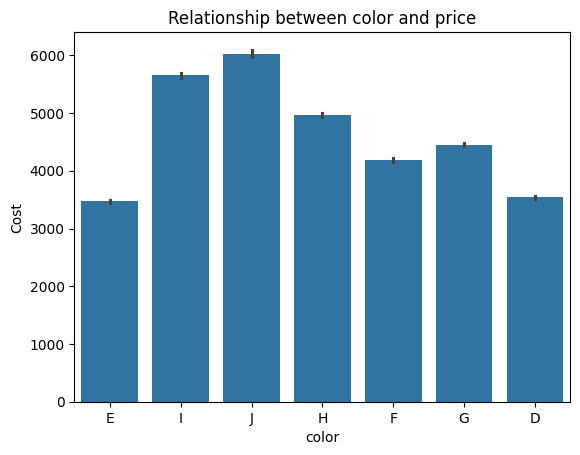

In [78]:
sns.barplot(x='color', y='cost_dollars', data=diamond_df)
plt.title('Relationship between color and price')
plt.ylabel('Cost')
plt.show()

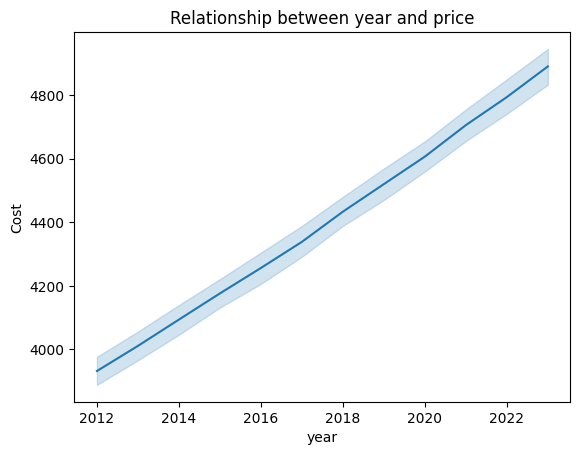

In [77]:
sns.lineplot(x='year', y='cost_dollars', data=diamond_df)
plt.title('Relationship between year and price')
plt.ylabel('Cost')
plt.show()

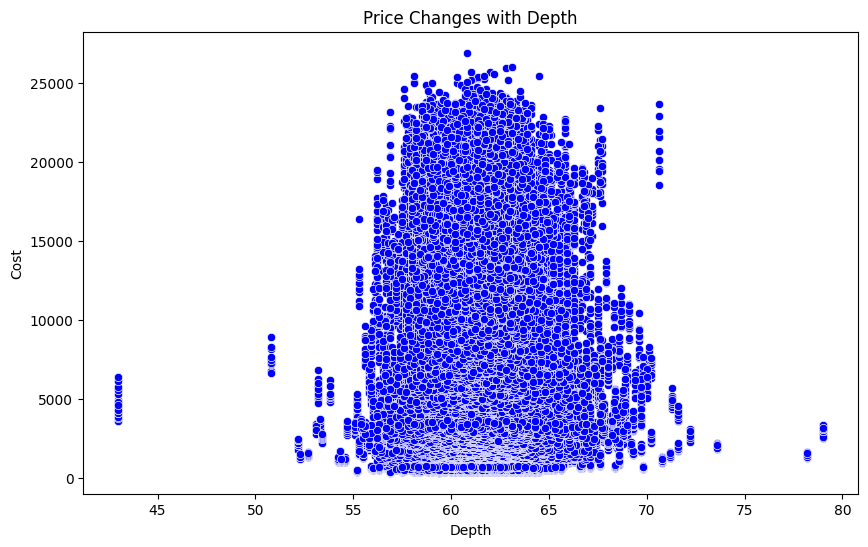

In [86]:
# Creating a scatter plot or line plot to visualize how the price changes with depth
plt.figure(figsize=(10, 6))
sns.scatterplot(x='depth', y='cost_dollars', data=diamond_df, marker='o', color='blue')
plt.title('Price Changes with Depth')
plt.xlabel('Depth')
plt.ylabel('Cost')
plt.show()

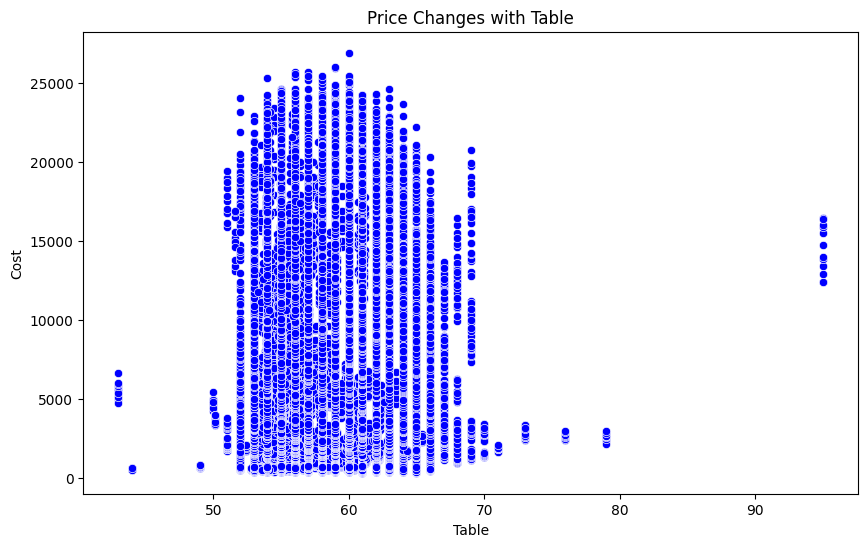

In [87]:
# Create a scatter plot or line plot to visualize how the price changes with depth
plt.figure(figsize=(10, 6))
sns.scatterplot(x='table', y='cost_dollars', data=diamond_df, marker='o', color='blue')
plt.title('Price Changes with Table')
plt.xlabel('Table')
plt.ylabel('Cost')
plt.show()

## 4. Clustering

In [89]:
# Assuming clustering_features is the subset of features used for clustering
clustering_features = ['carat', 'depth', 'table', 'length_mm', 'width_mm', 'height_mm']

# Select the features for clustering
X = diamond_df[clustering_features]

# Specify the number of clusters
n_clusters = 3

# Instantiate the KMeans model
kmeans = KMeans(n_clusters=n_clusters, random_state=42)

# Fit the model and get cluster labels
diamond_df['cluster_labels'] = kmeans.fit_predict(X)

# Display the first few rows of the DataFrame with cluster labels
print(diamond_df.head())

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


   index  carat        cut color clarity  depth  table  cost_dollars  \
1      1   0.23       Good     E     VS1   56.9   65.0           327   
2      2   0.29    Premium     I     VS2   62.4   58.0           334   
3      3   0.31       Good     J     SI2   63.3   58.0           335   
4      4   0.24  Very Good     J    VVS2   62.8   57.0           336   
5      5   0.24  Very Good     I    VVS1   62.3   57.0           336   

   length_mm  width_mm  height_mm  year  cluster_labels  
1       4.05      4.07       2.31  2012               2  
2       4.20      4.23       2.63  2012               0  
3       4.34      4.35       2.75  2012               0  
4       3.94      3.96       2.48  2012               0  
5       3.95      3.98       2.47  2012               0  


In [90]:
# Display descriptive statistics for each cluster
cluster_statistics = diamond_df.groupby('cluster_labels')[clustering_features].describe()

# Flatten the multi-level columns for better readability
cluster_statistics.columns = ['_'.join(col).strip() for col in cluster_statistics.columns.values]

# Print or display the descriptive statistics for each cluster
print(cluster_statistics)

                carat_count  carat_mean  carat_std  carat_min  carat_25%  \
cluster_labels                                                             
0                  175467.0    0.448824   0.154731       0.20       0.32   
1                  130795.0    1.243770   0.393321       0.35       1.01   
2                   96787.0    0.826724   0.441976       0.20       0.46   

                carat_50%  carat_75%  carat_max  depth_count  depth_mean  ...  \
cluster_labels                                                            ...   
0                    0.40       0.54       1.12     175467.0   61.929730  ...   
1                    1.11       1.50       4.13     130795.0   62.268794  ...   
2                    0.73       1.02       3.01      96787.0   60.714547  ...   

                width_mm_75%  width_mm_max  height_mm_count  height_mm_mean  \
cluster_labels                                                                
0                       5.25          6.62         1754

In [92]:
# Select relevant features
clustering_features = diamond_df[['carat', 'depth', 'table', 'length_mm', 'width_mm', 'height_mm']]

# Standardize the features
scaler = StandardScaler()
features_standardized = scaler.fit_transform(clustering_features)


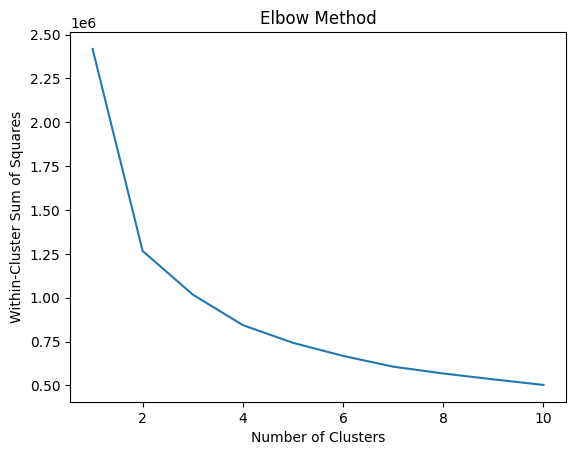

In [93]:
# Use the Elbow Method to find the optimal number of clusters
within_cluster_sum_of_squares = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(features_standardized)
    within_cluster_sum_of_squares.append(kmeans.inertia_)

# Plot the Elbow graph
plt.plot(range(1, 11), within_cluster_sum_of_squares)
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('Within-Cluster Sum of Squares')
plt.show()

In [94]:
# Choose the optimal number of clusters (e.g., 3 based on the Elbow Method)
k = 3

# Fit the K-Means model
kmeans = KMeans(n_clusters=k, init='k-means++', max_iter=300, n_init=10, random_state=0)
diamond_df['cluster'] = kmeans.fit_predict(features_standardized)


In [95]:
# Instantiate KMeans model
kmeans = KMeans(n_clusters=3, random_state=42)

# Add a new column 'cluster' to the DataFrame with cluster labels
diamond_df.loc[:, 'cluster'] = kmeans.fit_predict(features_standardized)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


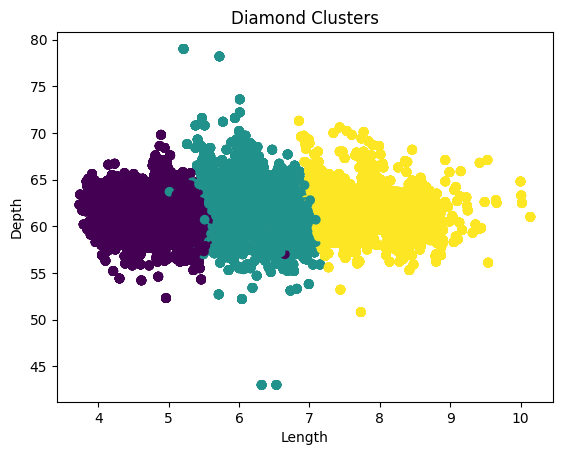

In [96]:
# Visualize the clusters (example using the first two features)
plt.scatter(diamond_df['length_mm'], diamond_df['depth'], c=diamond_df['cluster'], cmap='viridis')
plt.xlabel('Length')
plt.ylabel('Depth')
plt.title('Diamond Clusters')
plt.show()

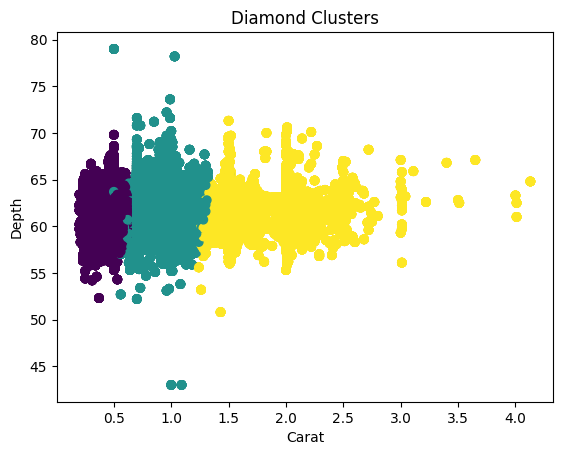

In [97]:
# Visualize the clusters (example using the first two features)
plt.scatter(diamond_df['carat'], diamond_df['depth'], c=diamond_df['cluster'], cmap='viridis')
plt.xlabel('Carat')
plt.ylabel('Depth')
plt.title('Diamond Clusters')
plt.show()

## 5. Questions & Answers

#### 1. how much do diamonds cost on average?

In [58]:
#Display the average price for each cut type
average_price_by_cut = diamond_df.groupby('cut')['cost_dollars'].mean()
print("Average price for each cut type:")
print(average_price_by_cut)

Average price for each cut type:
cut
Fair         4828.097935
Good         4378.448902
Ideal        3859.158092
Premium      5133.446845
Very Good    4469.439973
Name: cost_dollars, dtype: float64


#### 2. What is the variance in prices of diamonds?

In [67]:
statistics = diamond_df['cost_dollars'].describe()
variance = statistics['std'] ** 2

print("Descriptive Statistics for Prices:")
print(statistics)
print("\nVariance of Prices:", variance)

Descriptive Statistics for Prices:
count    403049.000000
mean       4396.659143
std        4500.786342
min         304.000000
25%        1053.000000
50%        2676.000000
75%        5983.000000
max       26930.000000
Name: cost_dollars, dtype: float64

Variance of Prices: 20257077.697808716
